# Lake Malome Study Notebook

In [1]:
import ee
# Initialize the Earth Engine module.
ee.Initialize()

In [2]:
from util import *

## Figure 2

## Figure 3

In [3]:
startDate = '2019-05-01'
endDate = '2019-05-30'

In [4]:
S2_BANDS = ee.List(['B12', 'B11', 'B8', 'B3', 'B4', 'B5', 'B2', 'QA60']) 
S2_NAMES = ee.List(['swir1', 'swir2', 'nir', 'green', 'red', 'red2', 'blue', 'QA60'])

In [5]:
geom = ee.Geometry.Polygon(
        [[[35.19496429044744, -14.647115511359019],
          [35.19496429044744, -14.661730297242592],
          [35.205263973064625, -14.661730297242592],
          [35.205263973064625, -14.647115511359019]]])

In [6]:
Sen2ImageCollection = ee.ImageCollection('COPERNICUS/S2_SR')\
.filterBounds(geom)\
.filterDate(startDate, endDate)\
.filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', 20)\
.select(S2_BANDS)\
.map(cloudMasking_S2_otsu)

In [7]:
bounds = ee.Geometry.Polygon(
[
    [
        [35.05117393493859,-14.567476706515635],
        [34.98249502357456,-14.56747684216918],
        [34.98249563853923,-14.712498859903812],
        [35.05117379139305,-14.71249872295211],
        [35.05117405325887,-14.712498726424245],
        [35.05117407847995,-14.71249872295211],
        [35.12078247974755,-14.71249872295211],
        [35.12078274161338,-14.712498726424252],
        [35.12078276683445,-14.71249872295211],
        [35.19039116810203,-14.712498722952114],
        [35.19039142996786,-14.712498726424249],
        [35.19039145518894,-14.71249872295211],
        [35.25999985645652,-14.71249872295211],
        [35.260000118322345,-14.712498726424249],
        [35.26000014354343,-14.71249872295211],
        [35.329608544811016,-14.71249872295211],
        [35.329608806676845,-14.712498726424249],
        [35.32960883189792,-14.712498722952114],
        [35.3992172331655,-14.71249872295211],
        [35.39921749503134,-14.712498726424249],
        [35.39921752025242,-14.71249872295211],
        [35.46882592151999,-14.71249872295211],
        [35.468826183385815,-14.712498726424252],
        [35.468826208606906,-14.71249872295211],
        [35.537504361460726,-14.712498859903809],
        [35.537504976425396,-14.56747684216918],
        [35.46882606506404,-14.56747670651563],
        [35.39921737670757,-14.567476706515633],
        [35.32960868835529,-14.567476706515635],
        [35.2600000000008,-14.567476706515635],
        [35.19039131164532,-14.567476706515633],
        [35.120782623289905,-14.56747670651563],
        [35.05117393493859,-14.567476706515635]
    ]
])

In [8]:
w = 0.15
h = 0.2
lon, lat = 35.26, -14.64

region = [lon + w, lat - h, lon - w, lat + h]

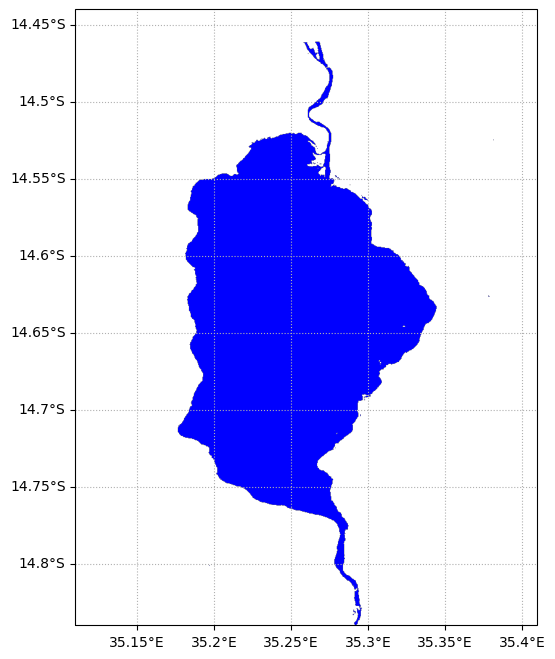

In [9]:
fig = plt.figure(figsize=(10, 8))

withWater = addWater_S2(Sen2ImageCollection, startDate, endDate, bounds)
withWater = withWater.divide(10000)
# print(withWater.select('water'))
waterVisParams = {
  'min': 0,
  'max': 1,
  'palette': ['Blue']
};

# use cartoee to get a map
ax = cartoee.get_map(withWater.select('water'), region=region, vis_params=waterVisParams)
cartoee.add_gridlines(ax, interval=[0.05, 0.05], linestyle=":")
plt.show()

In [10]:
S2_BANDS_2 = ['B12', 'B11', 'B8', 'B3', 'B4', 'B5', 'B2', 'QA60', 'water']
S2_NAMES_2 = ['swir1', 'swir2', 'nir', 'green', 'red', 'red2', 'blue', 'QA60', 'water']

updatedMaskedImage = withWater.select(S2_BANDS_2, S2_NAMES_2)

In [11]:
ChlaVisParam={
    'min':0,
    'max':20,
    'palette':['152E13', '183815', '1A4216', '1C4D17', '1E5817', '206416', '237015', '257D14', '278A12', '29980F', '2BA60C', '2EB509', '31C405', '34D400', '71DD22', 'A5E544', 'D0EC66']
};

In [16]:
equation = '9.547+104.809*((RED2-RED1)/(RED2+RED1))+431.976*((RED2-RED1)/(RED2+RED1))**2'

In [17]:
Chla = updatedMaskedImage.expression(equation,
    {'RED2':updatedMaskedImage.select('red2'),'RED1':updatedMaskedImage.select('red')})


In [18]:
mask = withWater.select('water').gt(0);
LakeWaterMask = updatedMaskedImage.updateMask(mask)
ChlaMask = Chla.updateMask(mask);

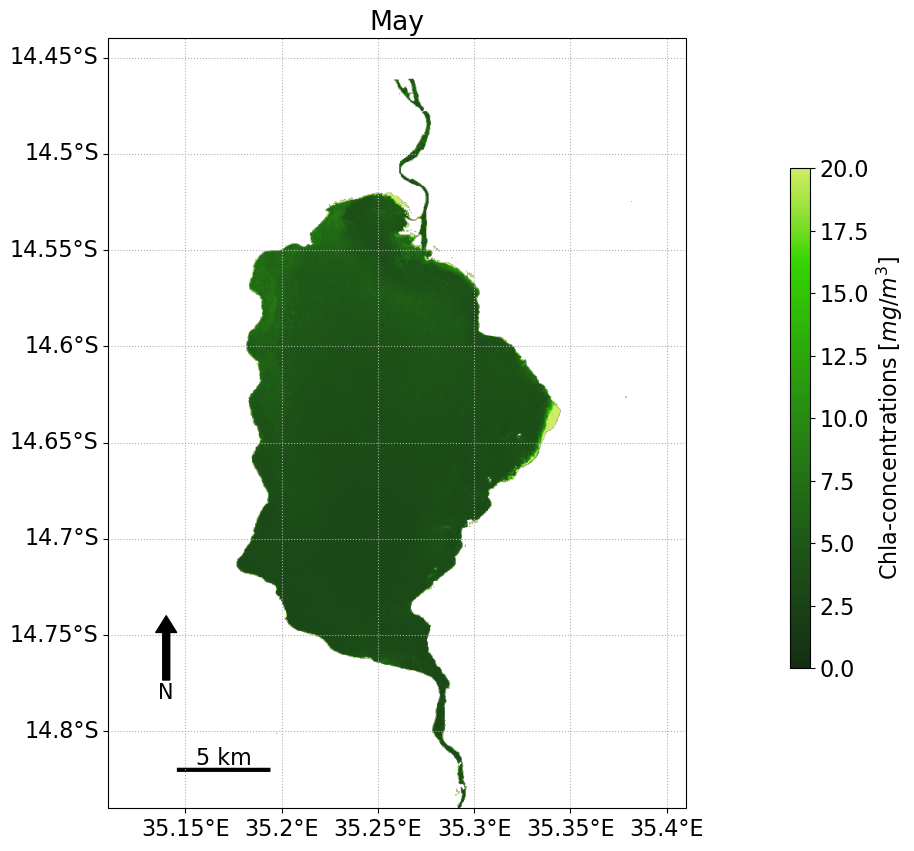

In [19]:
plt.rcParams.update({'font.size': 16})


fig = plt.figure(figsize=(10, 10))
ax = cartoee.get_map(ChlaMask, region=region, vis_params=ChlaVisParam)
ax.set_title('May')

cartoee.add_gridlines(ax, interval=[0.05, 0.05], linestyle=":")

cartoee.add_colorbar(
    ax, ChlaVisParam, loc="right", label="Chla-concentrations [$mg/m^3$]", orientation="vertical"
)

# add the gridlines and specify that the xtick labels be rotated 45 degrees
# cartoee.add_gridlines(ax, interval=0.5, xtick_rotation=0, linestyle=":")

# add north arrow
cartoee.add_north_arrow(
    ax, text="N", xy=(0.1, 0.25), text_color="black", arrow_color="black", fontsize=15
)

# add scale bar
cartoee.add_scale_bar_lite(
    ax, length=5, xy=(0.2, 0.05), fontsize=16, color="black", unit="km"
)